<h1>23AIML010 OM CHOKSI PMRP ASSIGNMENT 5 + CLASSWORK <h1>

<h1>CLASSWORK QUESTIONS<h1>

<h1>IPL DATA ANALYTICS<h1>


1.	Calculate the total number of matches played in each season
2.	Find the most successful team (team with the most wins)
3.	Find the average margin of victory by wickets and by runs
4. Which player won the most 'Player of the Match awards?
 
5.	Find the number of matches where the toss winner won the match
6.	Calculate the total number of runs scored in all matches for each team
 
7.	Determine the average number of wickets taken by the winning team in each match
8.	How many matches were decided by a Super Over?
 
9.	Find the distribution of match results (runs vs wickets)
 
10.	Find the top 5 venues with the most matches played
11.	Find the match with the highest margin of victory (by wickets or runs)
 
12.	Calculate the win percentage for each team
13.	Find the average number of overs played in all matches
 
14.	Find the most common match outcome (runs, wickets, or no result)
15.	Find the total number of matches played at each venue by year
16.	Analyze the win margin distribution by year
 
17.	Calculate the total number of 'no result' matches and their impact on the tournament
 
18.	How many matches were won by teams batting first vs. batting second?
19.	Find out the average number of runs scored by the winning team
 
20.	Identify the most successful captain (team with the most wins under a captain)


In [77]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('D:/SEM4/PMRP/RAW_CODE/PMRP_DAY_13/matches.csv')
df.head,df.tail,df.describe,df.info

(<bound method NDFrame.head of            id   season        city        date   match_type  player_of_match  \
 0      335982  2007/08   Bangalore  2008-04-18       League      BB McCullum   
 1      335983  2007/08  Chandigarh  2008-04-19       League       MEK Hussey   
 2      335984  2007/08       Delhi  2008-04-19       League      MF Maharoof   
 3      335985  2007/08      Mumbai  2008-04-20       League       MV Boucher   
 4      335986  2007/08     Kolkata  2008-04-20       League        DJ Hussey   
 ...       ...      ...         ...         ...          ...              ...   
 1090  1426307     2024   Hyderabad  2024-05-19       League  Abhishek Sharma   
 1091  1426309     2024   Ahmedabad  2024-05-21  Qualifier 1         MA Starc   
 1092  1426310     2024   Ahmedabad  2024-05-22   Eliminator         R Ashwin   
 1093  1426311     2024     Chennai  2024-05-24  Qualifier 2    Shahbaz Ahmed   
 1094  1426312     2024     Chennai  2024-05-26        Final         MA Starc  

1.Calculate the total number of Matches Played in Each Session 

In [78]:
matches_per_season = df['season'].value_counts().sort_index()
print(matches_per_season)

season
2007/08    58
2009       57
2009/10    60
2011       73
2012       74
2013       76
2014       60
2015       59
2016       60
2017       59
2018       60
2019       60
2020/21    60
2021       60
2022       74
2023       74
2024       71
Name: count, dtype: int64


2. Find the Most Successfull team (team with most runs)

In [79]:
# runs_df = df[df['result'] == 'runs']


# most_successful_team = runs_df.groupby('winner')['result_margin'].sum().idxmax()
# print(f"The most successful team (team with most runs) is: {most_successful_team}")

df["winner"].value_counts()

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Kings XI Punjab                 88
Sunrisers Hyderabad             88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Lucknow Super Giants            24
Punjab Kings                    24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

3. Find the average margin of victory by wickets and runs 

In [80]:
average_runs_margin = df[df['result'] == 'runs']['result_margin'].mean()
average_wickets_margin = df[df['result'] == 'wickets']['result_margin'].mean()
print(f'Average margin of victory by runs: {average_runs_margin}')
print(f'Average margin of victory by wickets: {average_wickets_margin}')


Average margin of victory by runs: 30.104417670682732
Average margin of victory by wickets: 6.192041522491349


4. Which player won the most 'Player of the Match awards?

In [81]:
most_player_of_match = df['player_of_match'].value_counts().idxmax()
print(f"The player who won the most 'Player of the Match' awards is: {most_player_of_match}")

The player who won the most 'Player of the Match' awards is: AB de Villiers


5.	Find the number of matches where the toss winner won the match

In [82]:
toss_winner_matches = df[df['toss_winner'] == df['winner']].shape[0]
print(f"The number of matches where the toss winner won the match: {toss_winner_matches}")

The number of matches where the toss winner won the match: 554


6.	Calculate the total number of runs scored in all matches for each team

In [83]:
total_runs_per_team = df.groupby('team1')['target_runs'].sum() + df.groupby('team2')['target_runs'].sum()
print(total_runs_per_team)

team1
Chennai Super Kings            39503.0
Deccan Chargers                12047.0
Delhi Capitals                 15930.0
Delhi Daredevils               25492.0
Gujarat Lions                   5077.0
Gujarat Titans                  7865.0
Kings XI Punjab                31391.0
Kochi Tuskers Kerala            2014.0
Kolkata Knight Riders          40557.0
Lucknow Super Giants            7835.0
Mumbai Indians                 43728.0
Pune Warriors                   6950.0
Punjab Kings                    9787.0
Rajasthan Royals               36250.0
Rising Pune Supergiant          2571.0
Rising Pune Supergiants         1993.0
Royal Challengers Bangalore    39807.0
Royal Challengers Bengaluru     2986.0
Sunrisers Hyderabad            30071.0
Name: target_runs, dtype: float64


7.	Determine the average number of wickets taken by the winning team in each match

In [84]:
average_wickets_taken = df[df['result'] == 'wickets']['result_margin'].mean()
print(f'The average number of wickets taken by the winning team in each match is: {average_wickets_taken}')

The average number of wickets taken by the winning team in each match is: 6.192041522491349


8.	How many matches were decided by a Super Over?

In [85]:
super_over_matches = df[df['super_over'] == 'Y'].shape[0]
print(f"The number of matches decided by a Super Over: {super_over_matches}")

The number of matches decided by a Super Over: 14


9.	Find the distribution of match results (runs vs wickets)

result
wickets      578
runs         498
tie           14
no result      5
Name: count, dtype: int64


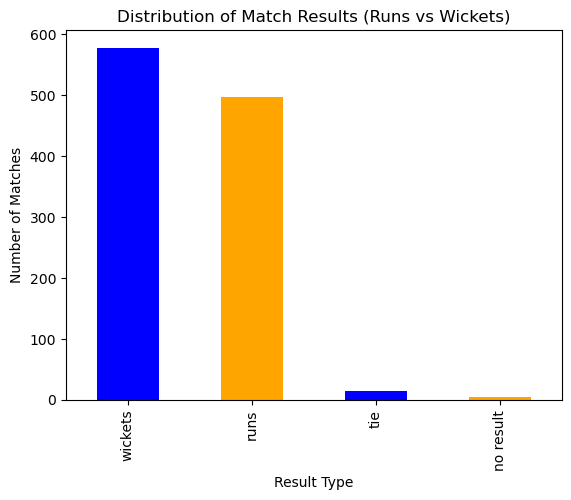

In [86]:
result_distribution = df['result'].value_counts()
print(result_distribution)

# Plotting the distribution
result_distribution.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Match Results (Runs vs Wickets)')
plt.xlabel('Result Type')
plt.ylabel('Number of Matches')
plt.show()


10.	Find the top 5 venues with the most matches played

In [87]:
top_venues = df['venue'].value_counts().head(5)
print(top_venues)

# # Plotting the top 5 venues
# top_venues.plot(kind='bar', color='green')
# plt.title('Top 5 Venues with the Most Matches Played')
# plt.xlabel('Venue')
# plt.ylabel('Number of Matches')
# plt.show()

venue
Eden Gardens                                 77
Wankhede Stadium                             73
M Chinnaswamy Stadium                        65
Feroz Shah Kotla                             60
Rajiv Gandhi International Stadium, Uppal    49
Name: count, dtype: int64


11.	Find the match with the highest margin of victory (by wickets or runs)

In [88]:
df[df['result_margin']==df['result_margin'].max()]


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
620,1082635,2017,Delhi,2017-05-06,League,LMP Simmons,Feroz Shah Kotla,Delhi Daredevils,Mumbai Indians,Delhi Daredevils,field,Mumbai Indians,runs,146.0,213.0,20.0,N,NaN,Nitin Menon,CK Nandan


In [89]:
# Find the match with the highest margin of victory (by wickets or runs) 
df_wickets=df[df['result']=='wickets']
df_runs=df[df['result']=='runs']

max_margin_wicket=df_wickets.loc[df_wickets['result_margin'].idxmax()]

max_margin_run=df_runs.loc[df_runs['result_margin'].idxmax()]

max_margin_run,max_margin_wicket



(id                          1082635
 season                         2017
 city                          Delhi
 date                     2017-05-06
 match_type                   League
 player_of_match         LMP Simmons
 venue              Feroz Shah Kotla
 team1              Delhi Daredevils
 team2                Mumbai Indians
 toss_winner        Delhi Daredevils
 toss_decision                 field
 winner               Mumbai Indians
 result                         runs
 result_margin                 146.0
 target_runs                   213.0
 target_overs                   20.0
 super_over                        N
 method                          NaN
 umpire1                 Nitin Menon
 umpire2                   CK Nandan
 Name: 620, dtype: object,
 id                                     335994
 season                                2007/08
 city                                   Mumbai
 date                               2008-04-27
 match_type                             Leagu


12.	Calculate the win percentage for each team


In [90]:
matches_played = df['team1'].value_counts() + df['team2'].value_counts()

matches_won = df['winner'].value_counts()
win_percentage = (matches_won / matches_played) * 100

print(win_percentage)

Chennai Super Kings            57.983193
Deccan Chargers                38.666667
Delhi Capitals                 52.747253
Delhi Daredevils               41.614907
Gujarat Lions                  43.333333
Gujarat Titans                 62.222222
Kings XI Punjab                46.315789
Kochi Tuskers Kerala           42.857143
Kolkata Knight Riders          52.191235
Lucknow Super Giants           54.545455
Mumbai Indians                 55.172414
Pune Warriors                  26.086957
Punjab Kings                   42.857143
Rajasthan Royals               50.678733
Rising Pune Supergiant         62.500000
Rising Pune Supergiants        35.714286
Royal Challengers Bangalore    48.333333
Royal Challengers Bengaluru    46.666667
Sunrisers Hyderabad            48.351648
Name: count, dtype: float64


13.	Find the average number of overs played in all matches

In [91]:
average_overs_played = df['target_overs'].mean()

print(f'The average number of overs played in all matches is: {average_overs_played}')

The average number of overs played in all matches is: 19.75934065934066


14.	Find the most common match outcome (runs, wickets, or no result)


In [92]:
most_common_outcome = result_distribution.idxmax()
print(f'The most common match outcome is: {most_common_outcome}')

The most common match outcome is: wickets


15.	Find the total number of matches played at each venue by year


In [93]:
matches_per_venue_year = df.groupby(['season','venue']).size()
print(matches_per_venue_year)

season   venue                                                             
2007/08  Dr DY Patil Sports Academy                                            4
         Eden Gardens                                                          7
         Feroz Shah Kotla                                                      6
         M Chinnaswamy Stadium                                                 7
         MA Chidambaram Stadium, Chepauk                                       7
                                                                              ..
2024     Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur    5
         Narendra Modi Stadium, Ahmedabad                                      8
         Rajiv Gandhi International Stadium, Uppal, Hyderabad                  6
         Sawai Mansingh Stadium, Jaipur                                        5
         Wankhede Stadium, Mumbai                                              7
Length: 175, dtype: int64


16.	Analyze the win margin distribution by year

                   count       mean        std  min    25%   50%    75%    max
season  result                                                                
2007/08 runs        24.0  29.375000  34.291351  1.0   8.25  16.0  35.00  140.0
        wickets     34.0   6.500000   2.078024  3.0   5.00   7.0   8.00   10.0
2009    runs        27.0  28.296296  28.894789  1.0  10.00  16.0  32.50   92.0
        tie          0.0        NaN        NaN  NaN    NaN   NaN    NaN    NaN
        wickets     29.0   6.206897   1.820112  2.0   6.00   6.0   7.00   10.0
2009/10 runs        31.0  31.483871  20.990269  2.0  15.50  31.0  39.00   98.0
        tie          0.0        NaN        NaN  NaN    NaN   NaN    NaN    NaN
        wickets     28.0   6.785714   1.571909  4.0   5.75   7.0   8.00   10.0
2011    no result    0.0        NaN        NaN  NaN    NaN   NaN    NaN    NaN
        runs        33.0  33.272727  26.081929  2.0  17.00  25.0  43.00  111.0
        wickets     39.0   6.794872   1.794428  3.0 

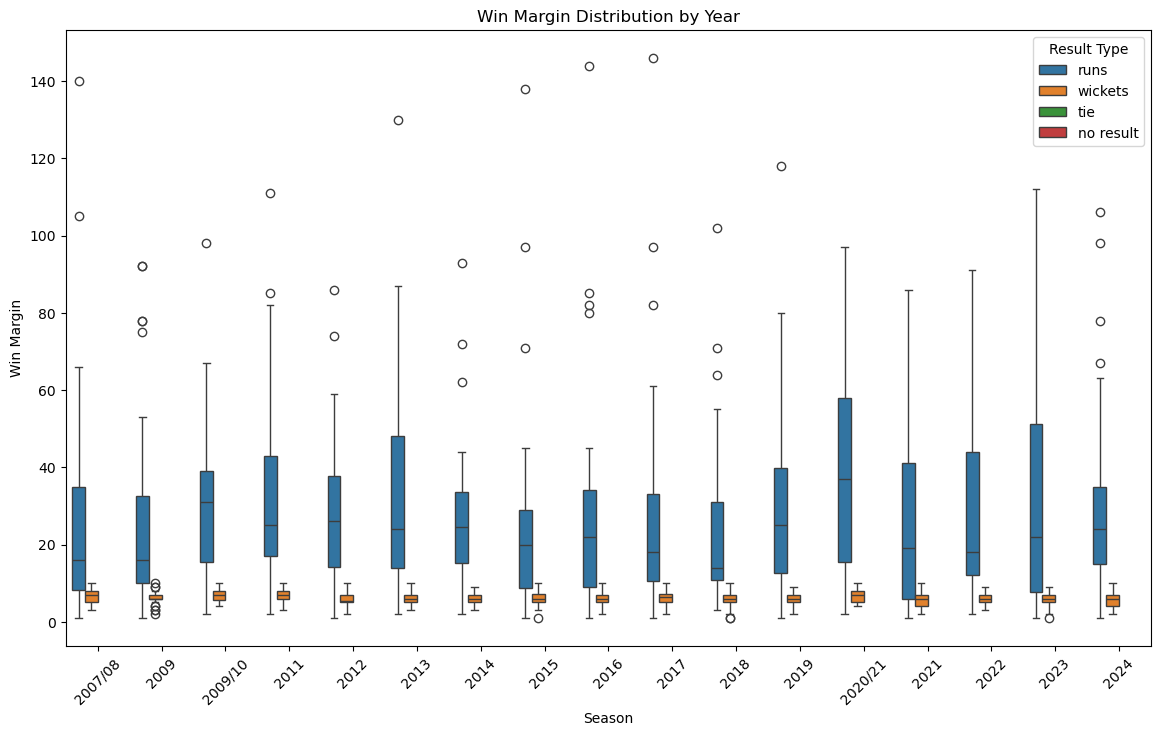

In [94]:
# Grouping the data by season and result type
win_margin_by_year = df.groupby(['season', 'result'])['result_margin'].describe()
print(win_margin_by_year)
# Plotting the win margin distribution by year
plt.figure(figsize=(14, 8))
sns.boxplot(x='season', y='result_margin', hue='result', data=df)
plt.title('Win Margin Distribution by Year')
plt.xlabel('Season')
plt.ylabel('Win Margin')
plt.xticks(rotation=45)
plt.legend(title='Result Type')
plt.show()

17.	Calculate the total number of 'no result' matches and their impact on the tournament

In [95]:
# Calculate the total number of 'no result' matches
no_result_matches = df[df['result'] == 'no result'].shape[0]
print(f"The total number of 'no result' matches: {no_result_matches}")

# Analyze the distribution of 'no result' matches by season
no_result_by_season = df[df['result'] == 'no result']['season'].value_counts().sort_index()
print("Distribution of 'no result' matches by season:")
print(no_result_by_season)

# Analyze the distribution of 'no result' matches by team
no_result_by_team = df[df['result'] == 'no result']['team1'].value_counts() + df[df['result'] == 'no result']['team2'].value_counts()
print("Distribution of 'no result' matches by team:")
print(no_result_by_team)

The total number of 'no result' matches: 5
Distribution of 'no result' matches by season:
season
2011    1
2015    2
2019    1
2023    1
Name: count, dtype: int64
Distribution of 'no result' matches by team:
Chennai Super Kings            NaN
Delhi Daredevils               2.0
Lucknow Super Giants           NaN
Pune Warriors                  NaN
Rajasthan Royals               NaN
Royal Challengers Bangalore    NaN
Name: count, dtype: float64


 
18.	How many matches were won by teams batting first vs. batting second?


In [96]:
# Matches won by teams batting first
batting_first_wins = df[(df['toss_decision'] == 'bat') & (df['toss_winner'] == df['winner'])].shape[0] + \
                     df[(df['toss_decision'] == 'field') & (df['toss_winner'] != df['winner'])].shape[0]

# Matches won by teams batting second
batting_second_wins = df[(df['toss_decision'] == 'field') & (df['toss_winner'] == df['winner'])].shape[0] + \
                      df[(df['toss_decision'] == 'bat') & (df['toss_winner'] != df['winner'])].shape[0]

print(f"Matches won by teams batting first: {batting_first_wins}")
print(f"Matches won by teams batting second: {batting_second_wins}")

Matches won by teams batting first: 504
Matches won by teams batting second: 591


19.	Find out the average number of runs scored by the winning team


In [97]:
average_runs_scored_by_winning_team = df[df['result'] == 'runs']['target_runs'].mean()
print(f'The average number of runs scored by the winning team is: {average_runs_scored_by_winning_team}')

The average number of runs scored by the winning team is: 179.69678714859438


 
20. Identify the most unsuccessful team (team with lowest wins)

In [98]:
most_unsuccessful_team = matches_won.idxmin()
print(f"The most unsuccessful team (team with the lowest wins) is: {most_unsuccessful_team}")

The most unsuccessful team (team with the lowest wins) is: Rising Pune Supergiants


<h1>ASSIGNMENT QUESTIONS <h1>

Explore following for given dataset and also perform EDA.
1. Frequency Distribution of Wins by Wickets
2. Relative Frequency Distribution
3. Cumulative Relative Frequency Graph
4. Probability of Winning by 6 Wickets or Less
5. Normal Distribution of Wins by Wickets
6. Mean, Standard Deviation, and Percentile Calculation
7. Find out outliers for the selective columns for lower range outliers will be lower than mu - 2sigma, similarly for upper range outliers will be greater than mu+2sigma.

1. Frequency Distribution of Wins by Wickets


result_margin
1.0       4
2.0      10
3.0      31
4.0      59
5.0      97
6.0     120
7.0     115
8.0      78
9.0      48
10.0     16
Name: count, dtype: int64


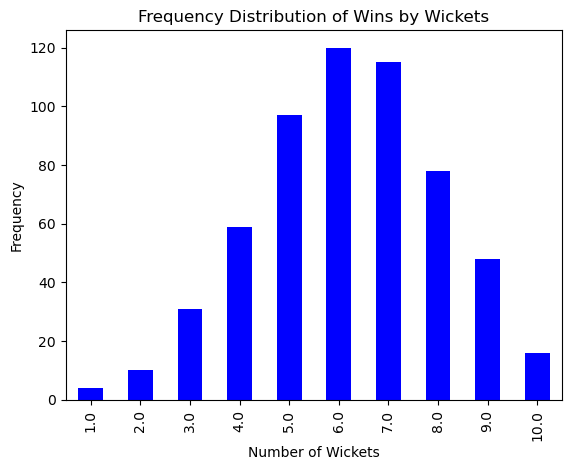

In [107]:
# Frequency distribution of wins by wickets
wins_by_wickets = df_wickets['result_margin'].value_counts().sort_index()
print(wins_by_wickets)

# Plotting the frequency distribution
wins_by_wickets.plot(kind='bar', color='blue')
plt.title('Frequency Distribution of Wins by Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Frequency')
plt.show()

2. Relative Frequency Distribution


result_margin
1.0     0.006920
2.0     0.017301
3.0     0.053633
4.0     0.102076
5.0     0.167820
6.0     0.207612
7.0     0.198962
8.0     0.134948
9.0     0.083045
10.0    0.027682
Name: count, dtype: float64


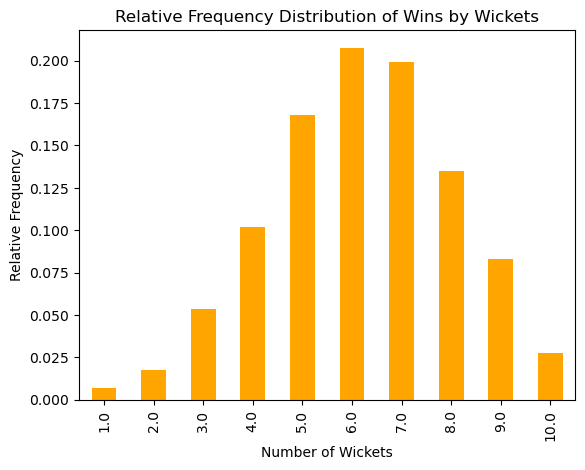

In [109]:
relative_frequency_wins_by_wickets = wins_by_wickets / wins_by_wickets.sum()
print(relative_frequency_wins_by_wickets)

# Plotting the relative frequency distribution
relative_frequency_wins_by_wickets.plot(kind='bar', color='orange')
plt.title('Relative Frequency Distribution of Wins by Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Relative Frequency')
plt.show()

3. Cumulative Relative Frequency Graph


result_margin
1.0     0.006920
2.0     0.024221
3.0     0.077855
4.0     0.179931
5.0     0.347751
6.0     0.555363
7.0     0.754325
8.0     0.889273
9.0     0.972318
10.0    1.000000
Name: count, dtype: float64


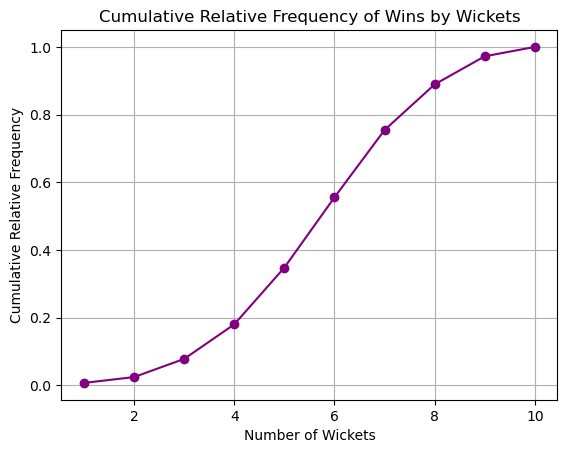

In [110]:
# Calculate the cumulative relative frequency
cumulative_relative_frequency = relative_frequency_wins_by_wickets.cumsum()
print(cumulative_relative_frequency)

# Plotting the cumulative relative frequency graph
cumulative_relative_frequency.plot(kind='line', marker='o', color='purple')
plt.title('Cumulative Relative Frequency of Wins by Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Cumulative Relative Frequency')
plt.grid(True)
plt.show()

4. Probability of Winning by 6 Wickets or Less


In [111]:
# Calculate the total number of wins by wickets
total_wins_by_wickets = wins_by_wickets.sum()

# Calculate the number of wins by 6 wickets or less
wins_by_6_or_less = wins_by_wickets[wins_by_wickets.index <= 6].sum()

# Calculate the probability
probability_wins_by_6_or_less = wins_by_6_or_less / total_wins_by_wickets
print(f'The probability of winning by 6 wickets or less is: {probability_wins_by_6_or_less}')

The probability of winning by 6 wickets or less is: 0.5553633217993079


5. Normal Distribution of Wins by Wickets


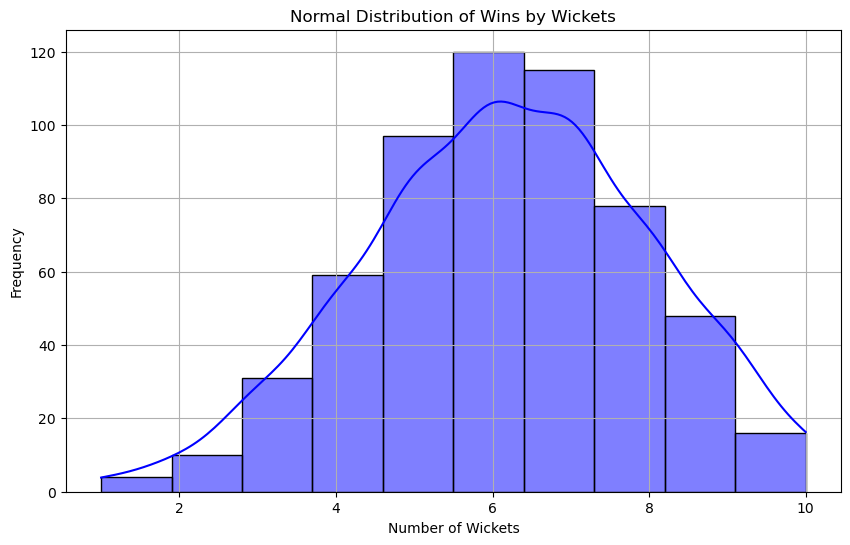

In [112]:
# Plotting the normal distribution of wins by wickets
plt.figure(figsize=(10, 6))
sns.histplot(df_wickets['result_margin'], kde=True, bins=10, color='blue')
plt.title('Normal Distribution of Wins by Wickets')
plt.xlabel('Number of Wickets')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

6. Mean, Standard Deviation, and Percentile Calculation


In [116]:
print(df.describe())

                 id  result_margin  target_runs  target_overs
count  1.095000e+03    1076.000000  1092.000000   1092.000000
mean   9.048283e+05      17.259294   165.684066     19.759341
std    3.677402e+05      21.787444    33.427048      1.581108
min    3.359820e+05       1.000000    43.000000      5.000000
25%    5.483315e+05       6.000000   146.000000     20.000000
50%    9.809610e+05       8.000000   166.000000     20.000000
75%    1.254062e+06      20.000000   187.000000     20.000000
max    1.426312e+06     146.000000   288.000000     20.000000


7. Find out outliers for the selective columns for lower range outliers will be lower than mu - 2sigma, similarly for upper range outliers will be greater than mu+2sigma.

In [118]:
# Calculate the mean and standard deviation for the result_margin column
mu = df['result_margin'].mean()
sigma = df['result_margin'].std()

# Calculate the lower and upper bounds for outliers
lower_bound = mu - 2 * sigma
upper_bound = mu + 2 * sigma

# Find the outliers
outliers = df[(df['result_margin'] < lower_bound) | (df['result_margin'] > upper_bound)]
print(outliers)

           id   season           city        date  match_type player_of_match  \
0      335982  2007/08      Bangalore  2008-04-18      League     BB McCullum   
9      335991  2007/08     Chandigarh  2008-04-25      League   KC Sangakkara   
39     336023  2007/08         Jaipur  2008-05-17      League        GC Smith   
55     336038  2007/08         Mumbai  2008-05-30  Semi Final       SR Watson   
59     392182     2009      Cape Town  2009-04-18      League        R Dravid   
...       ...      ...            ...         ...         ...             ...   
1030  1422125     2024        Chennai  2024-03-26      League          S Dube   
1039  1422134     2024  Visakhapatnam  2024-04-03      League       SP Narine   
1058  1426273     2024          Delhi  2024-04-20      League         TM Head   
1069  1426284     2024        Chennai  2024-04-28      League      RD Gaikwad   
1077  1426292     2024        Lucknow  2024-05-05      League       SP Narine   

                           